# problem statement:

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df=pd.read_excel('customer_retention_dataset.xlsx')

In [3]:
# Check first 5 rows and columns of dataset
df. head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
#Lets make all features into more redable format
df.columns = df.columns.str.replace('\t','')#remove \t from column name
df.columns = df.columns.str.replace('^\d+','') # remove digits/numbers from column name
df.columns = df.columns.str.strip() # removed whitespace at the beginning and end (both sides).

In [5]:
df.dtypes

Gender of respondent                                                    object
How old are you?                                                        object
Which city do you shop online from?                                     object
What is the Pin Code of where you shop online from?                      int64
Since How Long You are Shopping Online ?                                object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [6]:
df.shape

(269, 71)

In [7]:
# Check the name of columns
df.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past 1 year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without ma

In [8]:
#Renaming columns into a right form for easy & better understanding

df.columns=['Gender', 'Age', 'city', 'Pin Code', 'How Long You are Shopping Online', 'How many times in the past 1 year', 
              'How do you access the internet', 'device', 'screen size', 'operating system', 'browser', 
              'channel', 'After first visit', 'How much times', 'payment Option', 'How frequently do you abandon', 
              'Why did you abandon', 'content on the website', 'similar product', 'Complete information', 
              'relevant information', 'Ease of navigation', 'Loading and processing speed', 'User friendly', 
              'Convenient Payment methods', 'Trust that the online retail store', 'Empathy towards the customers', 
              'privacy of the customer', 'Responsiveness and availability', 'monetary benefit and discounts', 
              'Enjoyment is derived from shopping online', 'Shopping online is convenient and flexible', 
              'Return and replacement policy', 'Gaining access to loyalty', 'quality Information on the website', 
              'User derive satisfaction', 'Net Benefit', 'User satisfaction cannot exist without trust',
              'Offering a wide variety', 'Provision of complete and relevant product information', 
              'Monetary savings', 'The Convenience of patronizing the online retailer', 'sense of adventure', 
              'enhances your social status', 'gratification shopping on your favorite e-tailer', 
              'Shopping on the website helps you fulfill certain roles', 'Getting value for money spent',
              'you have shopped from', 'Easy to use website or application', 'Visual appealing web-page layout',
              'Wild variety of product on offer', 'Complete description information of products', 
              'Fast loading website speed of website and application', 'Reliability of the website or application', 
              'Quickness to complete purchase', 'Availability of several payment options', 'Speedy order delivery ', 
              'Privacy of customers’ information', 'Security of customer financial information', 'Perceived Trustworthiness', 
              'Presence of online assistance through multi-channel', 'Longer time to get logged in', 
              'Longer time in displaying graphics and photos', 'Late declaration of price', 'Longer page loading time',
              'Limited mode of payment on most products', 'Longer delivery period', 'Change in website/Application design', 
              'Frequent disruption when moving from one page to another', 'Website is as efficient as before', 
              'Which of the Indian online retailer would you recommend to a friend']

In [9]:
df.isnull()

,Gender,Age,city,Pin Code,How Long You are Shopping Online,How many times in the past 1 year,How do you access the internet,device,screen size,operating system,...,Longer time to get logged in,Longer time in displaying graphics and photos,Late declaration of price,Longer page loading time,Limited mode of payment on most products,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As there is no null values so for visualization I'll make some groups for analysing data

In [10]:
# Check Unique values of dataset
df.nunique()

Gender                                                                  2
Age                                                                     5
city                                                                   11
Pin Code                                                               39
How Long You are Shopping Online                                        5
                                                                       ..
Longer delivery period                                                  6
Change in website/Application design                                    7
Frequent disruption when moving from one page to another                8
Website is as efficient as before                                       8
Which of the Indian online retailer would you recommend to a friend     8
Length: 71, dtype: int64

In [11]:
#Getting information about each column which gives null value, count and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Gender                                                               269 non-null    object
 1   Age                                                                  269 non-null    object
 2   city                                                                 269 non-null    object
 3   Pin Code                                                             269 non-null    int64 
 4   How Long You are Shopping Online                                     269 non-null    object
 5   How many times in the past 1 year                                    269 non-null    object
 6   How do you access the internet                                       269 non-null    object
 7   device           

In [12]:
#This converts all the columns to string data type

df[['Gender', 'Age', 'city', 'Pin Code', 'How Long You are Shopping Online', 'How many times in the past 1 year', 
              'How do you access the internet', 'device', 'screen size', 'operating system', 'browser', 
              'channel', 'After first visit', 'How much times', 'payment Option', 'How frequently do you abandon', 
              'Why did you abandon', 'content on the website', 'similar product', 'Complete information', 
              'relevant information', 'Ease of navigation', 'Loading and processing speed', 'User friendly', 
              'Convenient Payment methods', 'Trust that the online retail store', 'Empathy towards the customers', 
              'privacy of the customer', 'Responsiveness and availability', 'monetary benefit and discounts', 
              'Enjoyment is derived from shopping online', 'Shopping online is convenient and flexible', 
              'Return and replacement policy', 'Gaining access to loyalty', 'quality Information on the website', 
              'User derive satisfaction', 'Net Benefit', 'User satisfaction cannot exist without trust',
              'Offering a wide variety', 'Provision of complete and relevant product information', 
              'Monetary savings', 'The Convenience of patronizing the online retailer', 'sense of adventure', 
              'enhances your social status', 'gratification shopping on your favorite e-tailer', 
              'Shopping on the website helps you fulfill certain roles', 'Getting value for money spent',
              'you have shopped from', 'Easy to use website or application', 'Visual appealing web-page layout',
              'Wild variety of product on offer', 'Complete description information of products', 
              'Fast loading website speed of website and application', 'Reliability of the website or application', 
              'Quickness to complete purchase', 'Availability of several payment options', 'Speedy order delivery ', 
              'Privacy of customers’ information', 'Security of customer financial information', 'Perceived Trustworthiness', 
              'Presence of online assistance through multi-channel', 'Longer time to get logged in', 
              'Longer time in displaying graphics and photos', 'Late declaration of price', 'Longer page loading time',
              'Limited mode of payment on most products', 'Longer delivery period', 'Change in website/Application design', 
              'Frequent disruption when moving from one page to another', 'Website is as efficient as before', 
              'Which of the Indian online retailer would you recommend to a friend']] = df[['Gender', 'Age', 
              'city', 'Pin Code', 'How Long You are Shopping Online', 'How many times in the past 1 year', 
              'How do you access the internet', 'device', 'screen size', 'operating system', 'browser', 
              'channel', 'After first visit', 'How much times', 'payment Option', 'How frequently do you abandon', 
              'Why did you abandon', 'content on the website', 'similar product', 'Complete information', 
              'relevant information', 'Ease of navigation', 'Loading and processing speed', 'User friendly', 
              'Convenient Payment methods', 'Trust that the online retail store', 'Empathy towards the customers', 
              'privacy of the customer', 'Responsiveness and availability', 'monetary benefit and discounts', 
              'Enjoyment is derived from shopping online', 'Shopping online is convenient and flexible', 
              'Return and replacement policy', 'Gaining access to loyalty', 'quality Information on the website', 
              'User derive satisfaction', 'Net Benefit', 'User satisfaction cannot exist without trust',
              'Offering a wide variety', 'Provision of complete and relevant product information', 
              'Monetary savings', 'The Convenience of patronizing the online retailer', 'sense of adventure', 
              'enhances your social status', 'gratification shopping on your favorite e-tailer', 
              'Shopping on the website helps you fulfill certain roles', 'Getting value for money spent',
              'you have shopped from', 'Easy to use website or application', 'Visual appealing web-page layout',
              'Wild variety of product on offer', 'Complete description information of products', 
              'Fast loading website speed of website and application', 'Reliability of the website or application', 
              'Quickness to complete purchase', 'Availability of several payment options', 'Speedy order delivery ', 
              'Privacy of customers’ information', 'Security of customer financial information', 'Perceived Trustworthiness', 
              'Presence of online assistance through multi-channel', 'Longer time to get logged in', 
              'Longer time in displaying graphics and photos', 'Late declaration of price', 'Longer page loading time',
               'Limited mode of payment on most products', 'Longer delivery period', 'Change in website/Application design', 
              'Frequent disruption when moving from one page to another', 'Website is as efficient as before', 
              'Which of the Indian online retailer would you recommend to a friend']].astype(str)                                                                             

In [13]:
df.dtypes

Gender                                                                 object
Age                                                                    object
city                                                                   object
Pin Code                                                               object
How Long You are Shopping Online                                       object
                                                                        ...  
Longer delivery period                                                 object
Change in website/Application design                                   object
Frequent disruption when moving from one page to another               object
Website is as efficient as before                                      object
Which of the Indian online retailer would you recommend to a friend    object
Length: 71, dtype: object

In [14]:
df.describe()

,Gender,Age,city,Pin Code,How Long You are Shopping Online,How many times in the past 1 year,How do you access the internet,device,screen size,operating system,...,Longer time to get logged in,Longer time in displaying graphics and photos,Late declaration of price,Longer page loading time,Limited mode of payment on most products,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend
count,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,39,5,6,4,4,4,3,...,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,201308,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Window/windows Mobile,...,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,38,98,114,142,141,134,122,...,57,60,75,61,87,72,96,53,94,79


In [15]:
# Exploring Categorical Columns

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------')
        print('\n')

Gender : ['Male' 'Female']
Female    181
Male       88
Name: Gender, dtype: int64
---------------------------------------------------------------


Age : ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
---------------------------------------------------------------


city : ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64
---------------------------------------------------------------


Pin Code : ['110009' '110030' '201308' '132001' '530068' '110011' '110018' '173229'
 '110039' '244001'

Perceived Trustworthiness : ['Flipkart.com' 'Myntra.com' 'Amazon.in, Myntra.com'
 'Amazon.in, Flipkart.com, Snapdeal.com'
 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'
 'Amazon.in' 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'
 'Amazon.in, Flipkart.com' 'Amazon.in, Flipkart.com, Paytm.com']
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64
-----------------------------------

# Exploratory data analysis

customer related analysis

Female    181
Male       88
Name: Gender, dtype: int64


<AxesSubplot:>

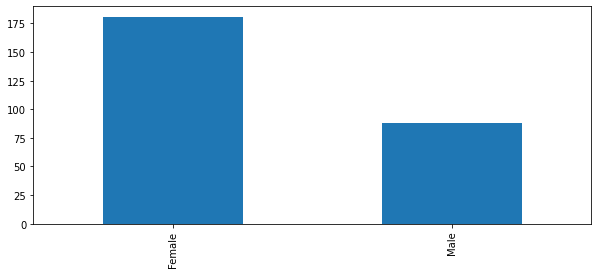

In [16]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Gender'].value_counts())

df['Gender'].value_counts().sort_index().plot.bar()

From the above analysis, it has been observed that around 70% of the customers are women

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

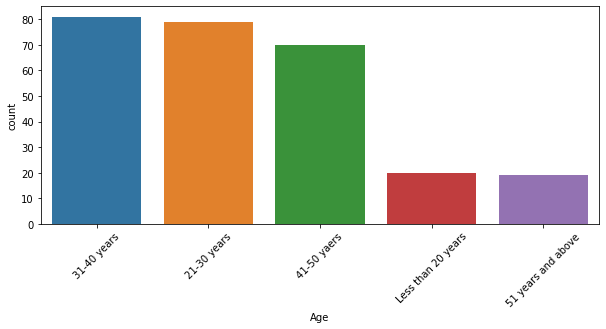

In [17]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Age'].value_counts())
sns.countplot(df['Age'])

Most of the customers are aged between 31 to 40 years do online shopping,

next comes the customers aged between 21 to 30 yers old and so on as shown in graph above

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

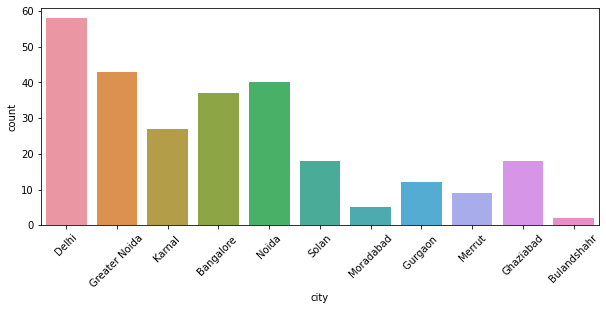

In [18]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)

print(df['city'].value_counts())
sns.countplot(df['city'])

Customers from delhi have the highest online shopping actions than comes the greater noida and least online shopping is in bulandshahar

So we can also say that the people from Metro Cities like Delhi-NCR, Bangalore are more preferred or active on online shopping sites

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: How do you access the internet, dtype: int64


<AxesSubplot:>

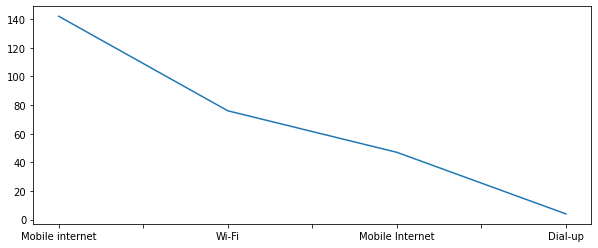

In [19]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['How do you access the internet'].value_counts())
df['How do you access the internet'].value_counts().plot.line()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: device, dtype: int64


<AxesSubplot:xlabel='device', ylabel='count'>

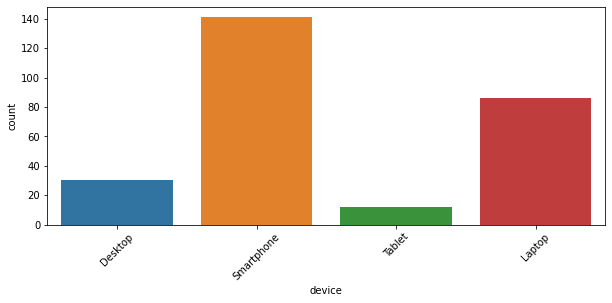

In [20]:
# Checking the number of people using which device for online shopping
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['device'].value_counts())
sns.countplot(df['device'])

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: How Long You are Shopping Online, dtype: int64


<AxesSubplot:>

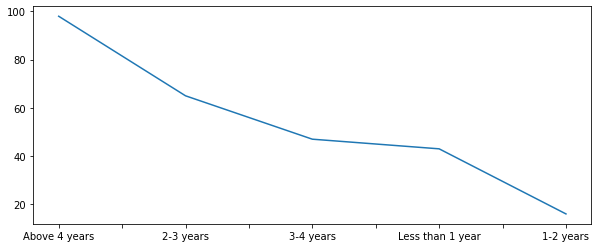

In [21]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['How Long You are Shopping Online'].value_counts())
df['How Long You are Shopping Online'].value_counts().plot.line()

Here we can see that mostly people are using smartphone for online shopping , So we can say that people are very comfortable to use smartphone and It is more easier to operate than other device

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: operating system, dtype: int64


<AxesSubplot:xlabel='operating system', ylabel='count'>

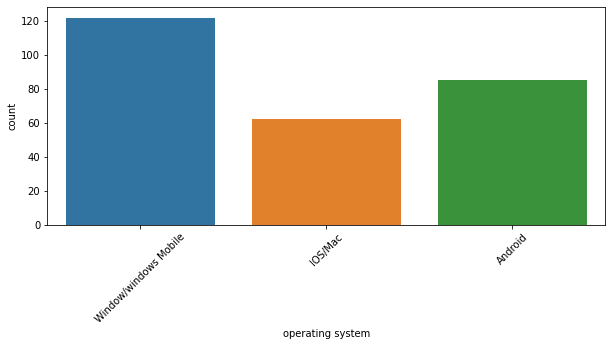

In [22]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['operating system'].value_counts())
sns.countplot(df['operating system'])

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browser, dtype: int64


<AxesSubplot:xlabel='browser', ylabel='count'>

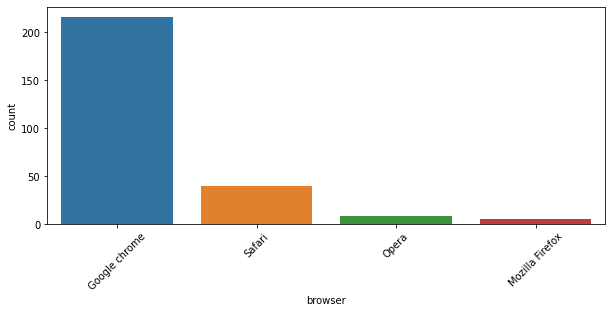

In [23]:
# checking  which browser preferred by people for online shoppings
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['browser'].value_counts())
sns.countplot(df['browser'])

According to analysis, Google Chrome has the highest usage browser for online shoppings or we can say that people has lots of faith on Google Chrome for online transactions or shoppings. This is the biggest achievement for Google.

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channel, dtype: int64


<AxesSubplot:xlabel='channel', ylabel='count'>

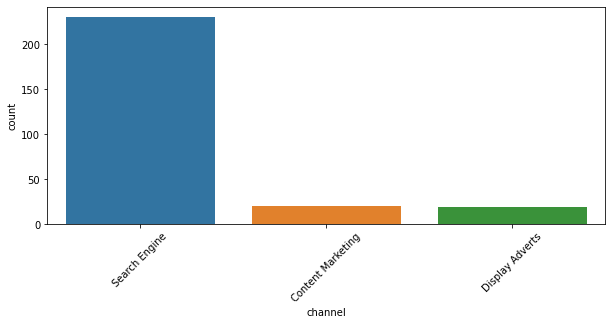

In [24]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['channel'].value_counts())
sns.countplot(df['channel'])

# conclusion for customer related information

 In people doing online shopping Females are more as compared to Males.

 People in the age group from 21 to 50 are doing more online shopping as compared to other age groups.

 Delhi Topped in the city list where more number of people doing online shopping.

 Mostly people are using mobile internet while shopping online.

 Mostly People are doing online shopping through smartphone.

 People having windows as operating system(OS) have maximum count.

 Mostly people are choosing google chrome as browser to access the website

 People are mostly use search engine to arrive at their favorite online store for the first time.

 After first visit people are using application or search engine to access website.

<AxesSubplot:>

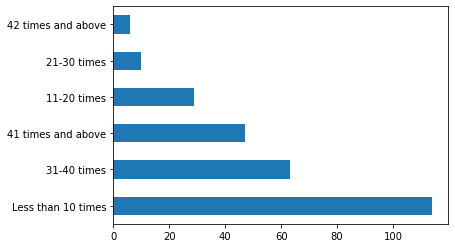

In [25]:
df['How many times in the past 1 year'].value_counts().plot.barh()

Most customers fall under the category of less than 10 orders per year, around the same number fall under the category where no of orders is more than 30

The number of customers who made more than 30 would be our area of interest are they are loyal customers / likely to purchase more

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: payment Option, dtype: int64


<AxesSubplot:xlabel='payment Option', ylabel='count'>

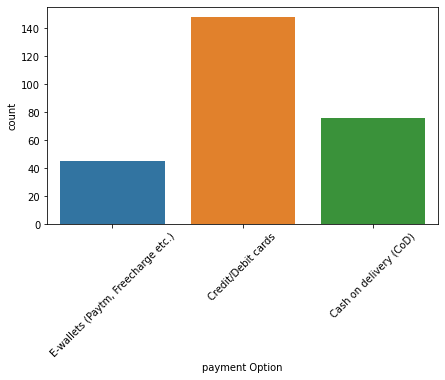

In [26]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=45)
print(df['payment Option'].value_counts())
sns.countplot(df['payment Option'])

Mostly people are using credit and debit cards as their preferred payment option.

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Why did you abandon, dtype: int64


<AxesSubplot:>

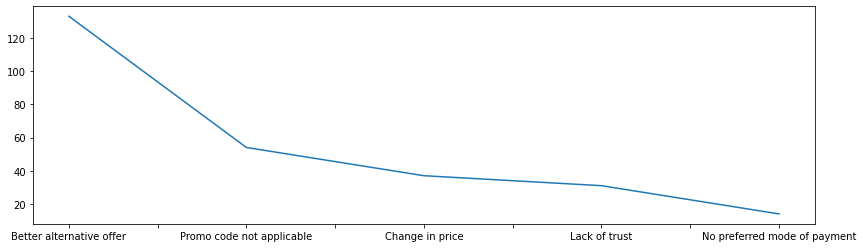

In [27]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=45)
print(df['Why did you abandon'].value_counts())
df['Why did you abandon'].value_counts().plot.line()

Now we Analysing the Feed-Back from Customers

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User friendly, dtype: int64


<AxesSubplot:xlabel='User friendly', ylabel='count'>

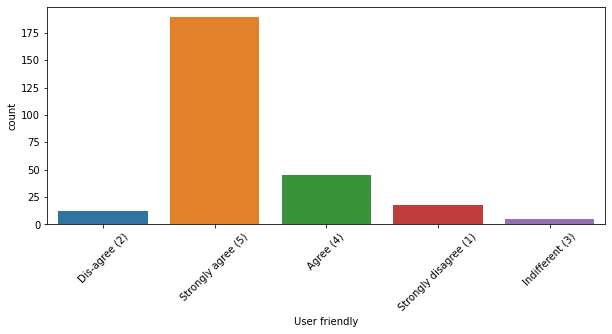

In [28]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['User friendly'].value_counts())
sns.countplot(df['User friendly'])

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient Payment methods, dtype: int64


<AxesSubplot:xlabel='Convenient Payment methods', ylabel='count'>

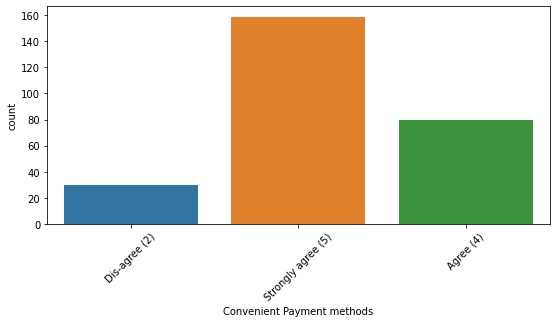

In [29]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=45)
print(df['Convenient Payment methods'].value_counts())
sns.countplot(df['Convenient Payment methods'])

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Responsiveness and availability, dtype: int64


<AxesSubplot:xlabel='Responsiveness and availability', ylabel='count'>

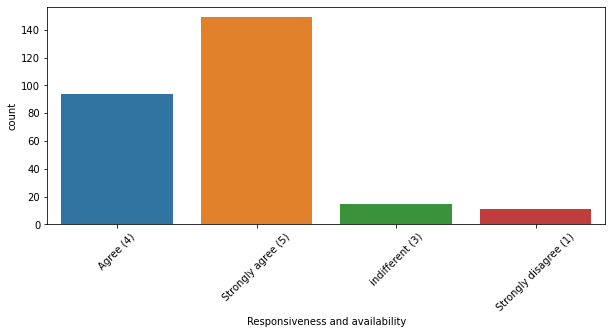

In [30]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Responsiveness and availability'].value_counts())
sns.countplot(df['Responsiveness and availability'])

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: monetary benefit and discounts, dtype: int64


<AxesSubplot:xlabel='monetary benefit and discounts', ylabel='count'>

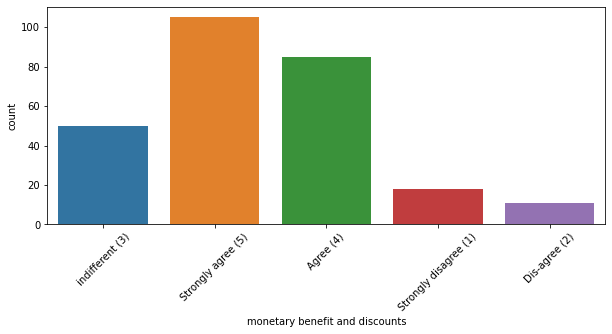

In [31]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['monetary benefit and discounts'].value_counts())
sns.countplot(df['monetary benefit and discounts'])

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: quality Information on the website, dtype: int64


<AxesSubplot:xlabel='quality Information on the website', ylabel='count'>

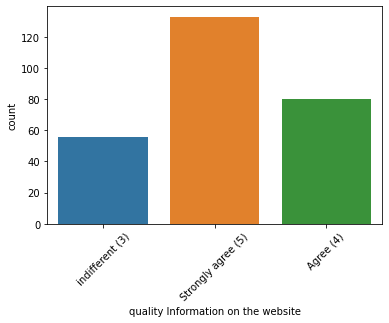

In [32]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['quality Information on the website'].value_counts())
sns.countplot(df['quality Information on the website'])

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return and replacement policy, dtype: int64


<AxesSubplot:xlabel='Return and replacement policy', ylabel='count'>

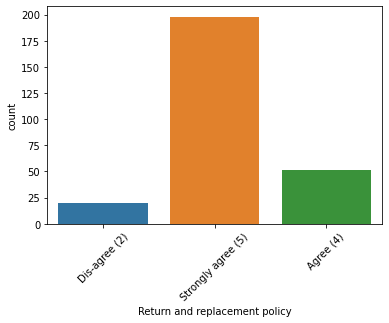

In [33]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Return and replacement policy'].value_counts())
sns.countplot(df['Return and replacement policy'])

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Getting value for money spent, dtype: int64


<AxesSubplot:xlabel='Getting value for money spent', ylabel='count'>

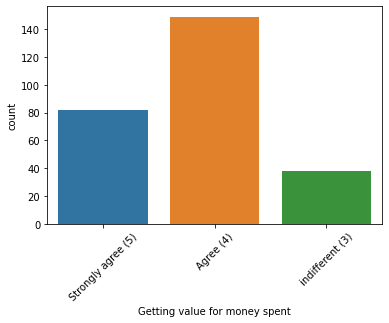

In [34]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Getting value for money spent'].value_counts())
sns.countplot(df['Getting value for money spent'])

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: sense of adventure, dtype: int64


<AxesSubplot:xlabel='sense of adventure', ylabel='count'>

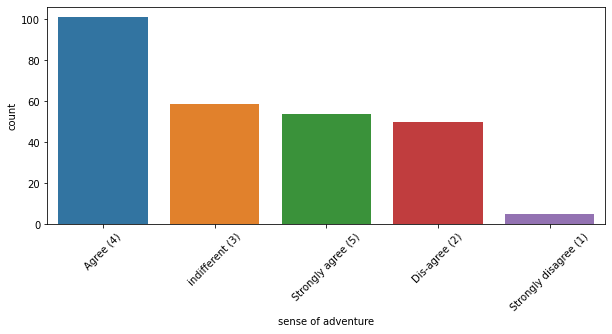

In [35]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['sense of adventure'].value_counts())
sns.countplot(df['sense of adventure'])

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: privacy of the customer, dtype: int64


<AxesSubplot:xlabel='privacy of the customer', ylabel='count'>

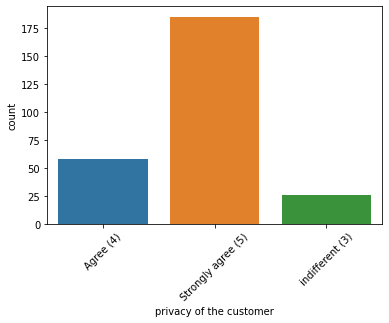

In [36]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['privacy of the customer'].value_counts())
sns.countplot(df['privacy of the customer'])

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net Benefit, dtype: int64


<AxesSubplot:xlabel='Net Benefit', ylabel='count'>

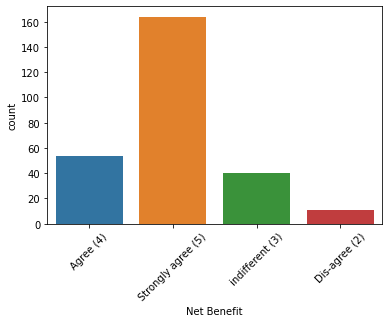

In [37]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Net Benefit'].value_counts())
sns.countplot(df['Net Benefit'])

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Shopping online is convenient and flexible, dtype: int64


<AxesSubplot:xlabel='Shopping online is convenient and flexible', ylabel='count'>

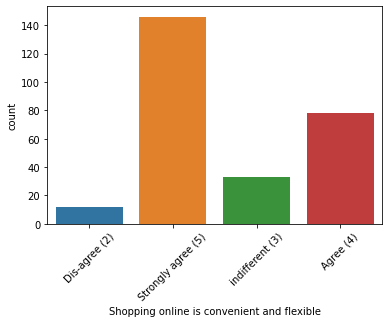

In [38]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Shopping online is convenient and flexible'].value_counts())
sns.countplot(df['Shopping online is convenient and flexible'])

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: Gaining access to loyalty, dtype: int64


<AxesSubplot:xlabel='Gaining access to loyalty', ylabel='count'>

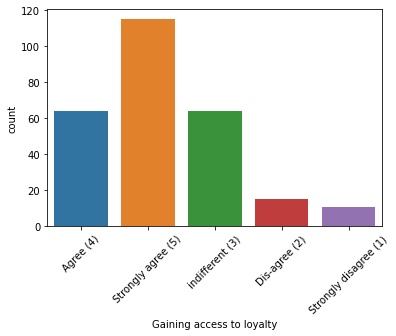

In [39]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Gaining access to loyalty'].value_counts())
sns.countplot(df['Gaining access to loyalty'])

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: User satisfaction cannot exist without trust, dtype: int64


<AxesSubplot:xlabel='User satisfaction cannot exist without trust', ylabel='count'>

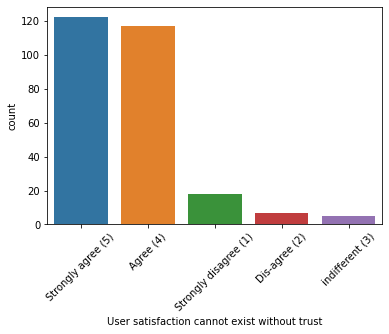

In [40]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['User satisfaction cannot exist without trust'].value_counts())
sns.countplot(df['User satisfaction cannot exist without trust'])

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: Provision of complete and relevant product information, dtype: int64


<AxesSubplot:xlabel='Provision of complete and relevant product information', ylabel='count'>

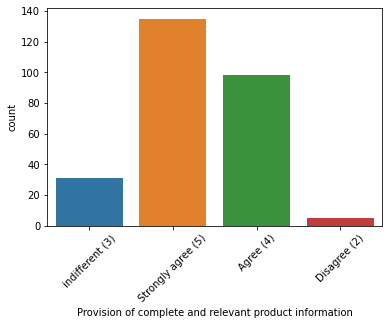

In [41]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['Provision of complete and relevant product information'].value_counts())
sns.countplot(df['Provision of complete and relevant product information'])

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: The Convenience of patronizing the online retailer, dtype: int64


<AxesSubplot:xlabel='The Convenience of patronizing the online retailer', ylabel='count'>

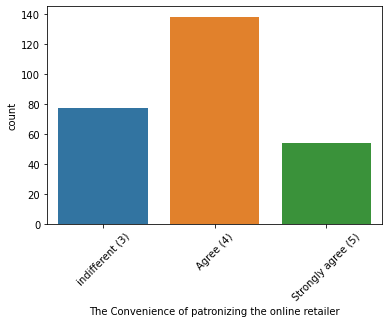

In [42]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['The Convenience of patronizing the online retailer'].value_counts())
sns.countplot(df['The Convenience of patronizing the online retailer'])

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: gratification shopping on your favorite e-tailer, dtype: int64


<AxesSubplot:xlabel='gratification shopping on your favorite e-tailer', ylabel='count'>

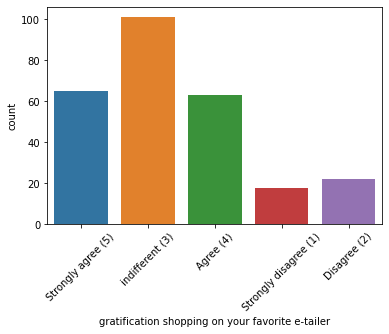

In [43]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=45)
print(df['gratification shopping on your favorite e-tailer'].value_counts())
sns.countplot(df['gratification shopping on your favorite e-tailer'])

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: enhances your social status, dtype: int64


<AxesSubplot:xlabel='enhances your social status', ylabel='count'>

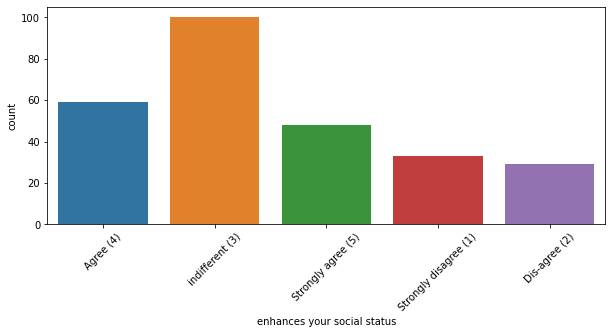

In [44]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['enhances your social status'].value_counts())
sns.countplot(df['enhances your social status'])

Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: Shopping on the website helps you fulfill certain roles, dtype: int64


<AxesSubplot:xlabel='Shopping on the website helps you fulfill certain roles', ylabel='count'>

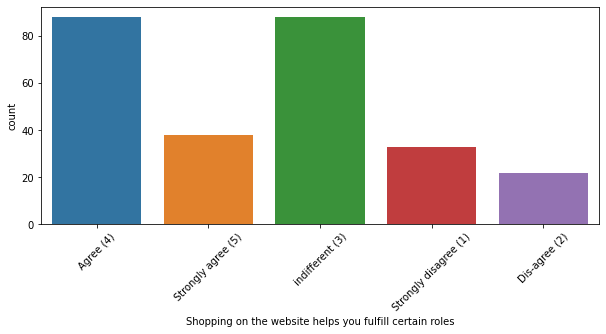

In [45]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Shopping on the website helps you fulfill certain roles'].value_counts())
sns.countplot(df['Shopping on the website helps you fulfill certain roles'])

# Conclusion From Customer's Feed-Back

People strongly agree that

   Website has user friendly interface. 

   Payment method Should be convenient.

   Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc ) is necessary.

   Online shopping gives monetary benefit and discounts to the customers.

   Displaying quality Information on the website improves satisfaction of customers.

   Return and replacement policy of the e-tailer is important for purchase decision.

   Doing online shopping give them value of money spend.

   Shopping on the website give them sense of adventure.

   Being able to guarantee the privacy of the customer

   User derive satisfaction while shopping on a good quality website or application.

   Shopping online is convenient and flexible.

   Gaining access to loyalty programs is a benefit of shopping online.

   User satisfaction exist when they have trust one website. 

   Their should be provision of complete and relevant product information website.

   They feel gratification shopping on your favorite e-tailer.

   The Convenience of patronizing the online retailer.

User have indifferent opnion that shopping on their preferred e-tailer enhances their social status.

User have mixed reaction on wheither shopping on website helps them to fulfil certain roles some agree it some are indifferent .

# Different Websites or online Shopping Platform Used By Customers

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


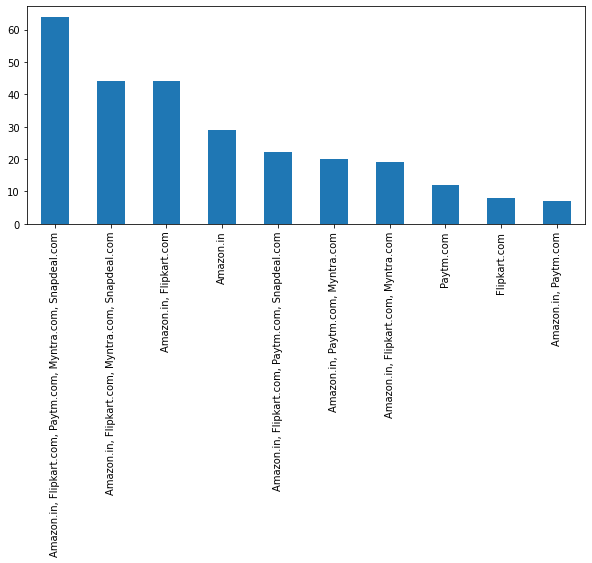

In [46]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Easy to use website or application'].value_counts())
df['Easy to use website or application'].value_counts().plot(kind="bar")
plt.show()

As per above graph, Majority of the customers are using Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com as It is Easy to use Websites and as our earlier analysis on device using category shows that Most of the people are using Smartphone and all of these online platform has their own mobile application which has lots of features even and Easy to use

Amazon is the choice of among 90% Users, Showing very clear in above Graph

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


<AxesSubplot:>

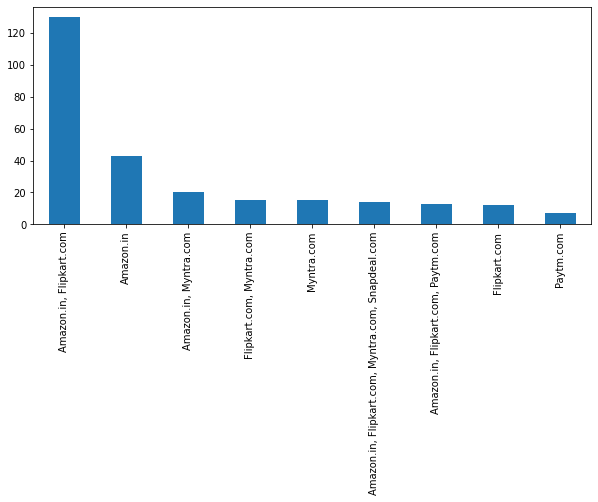

In [47]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Wild variety of product on offer'].value_counts())
df['Wild variety of product on offer'].value_counts().plot(kind="bar")

Website like Amazon and Flipkart have visual appealing webpage layout and they offer wild variety of products.

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


<AxesSubplot:>

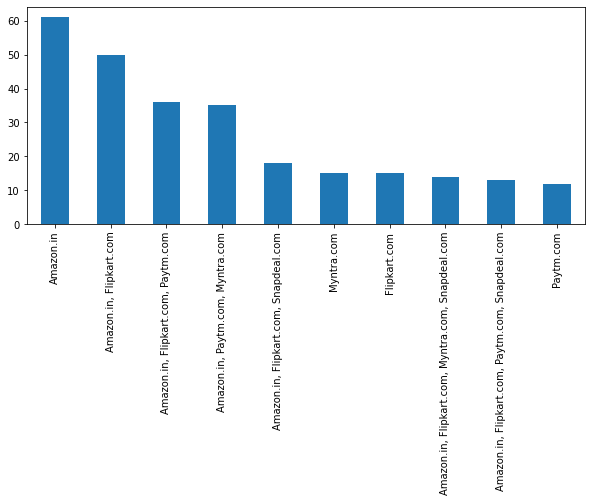

In [48]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=50)
print(df['Reliability of the website or application'].value_counts())
df['Reliability of the website or application'].value_counts().plot(kind="bar")

For Reliability of the website or application

61 out of 269 customers choose amazon and

50 out of 269 customers choose amazon and flipkart

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


<AxesSubplot:xlabel='Privacy of customers’ information', ylabel='count'>

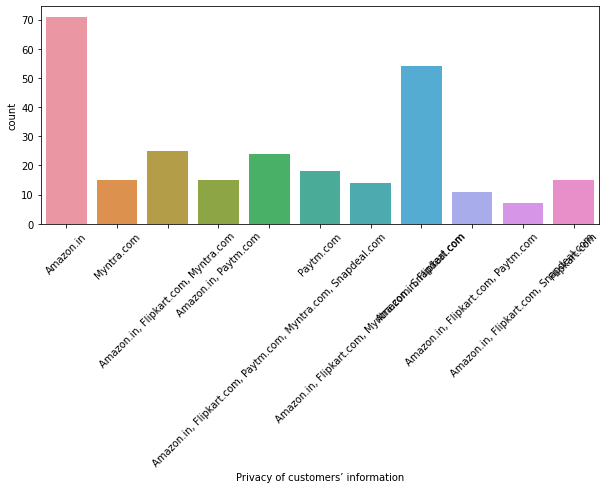

In [49]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Privacy of customers’ information'].value_counts())
sns.countplot(df['Privacy of customers’ information'])

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


<AxesSubplot:xlabel='Security of customer financial information', ylabel='count'>

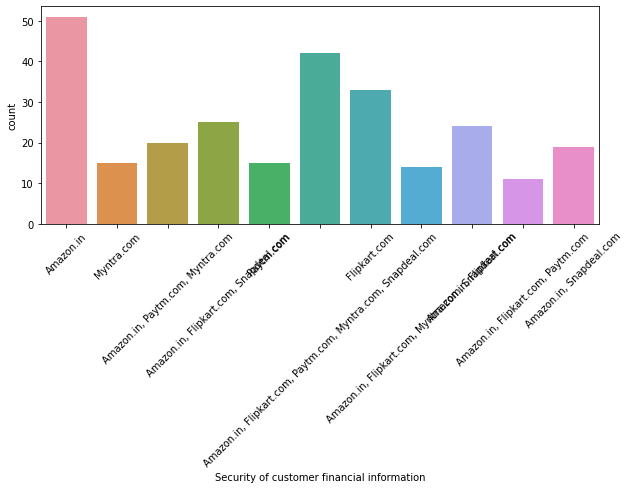

In [50]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Security of customer financial information'].value_counts())
sns.countplot(df['Security of customer financial information'])

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


<AxesSubplot:>

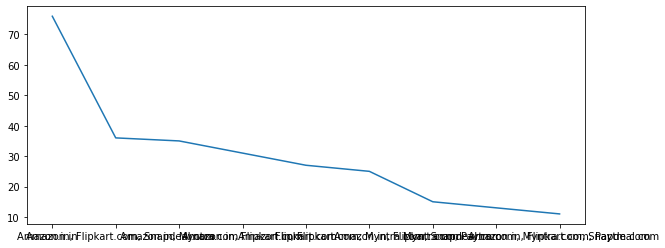

In [51]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Perceived Trustworthiness'].value_counts())
df['Perceived Trustworthiness'].value_counts().plot(kind="line")

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

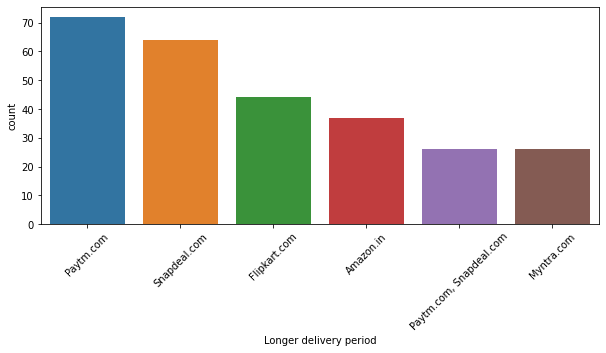

In [52]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Longer delivery period'].value_counts())
sns.countplot(df['Longer delivery period'])

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


<AxesSubplot:xlabel='Change in website/Application design', ylabel='count'>

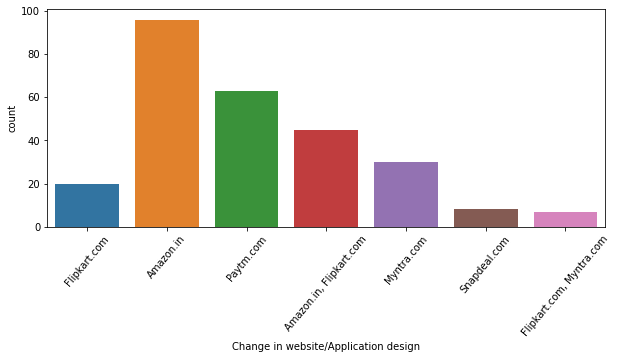

In [53]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=50)
print(df['Change in website/Application design'].value_counts())
sns.countplot(df['Change in website/Application design'])


In Change in website/Application design amazon.in topped the list.

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


<AxesSubplot:xlabel='Website is as efficient as before', ylabel='count'>

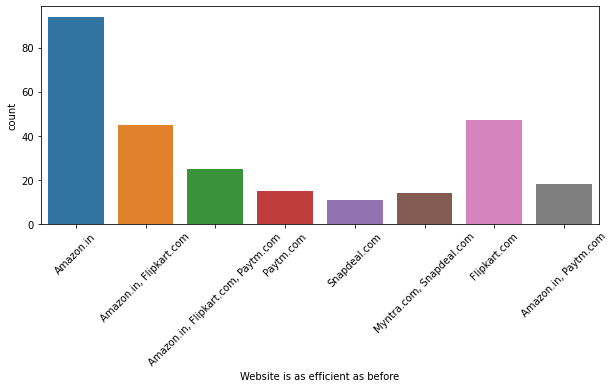

In [54]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=45)
print(df['Website is as efficient as before'].value_counts())
sns.countplot(df['Website is as efficient as before'])

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend, dtype: int64


<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend', ylabel='count'>

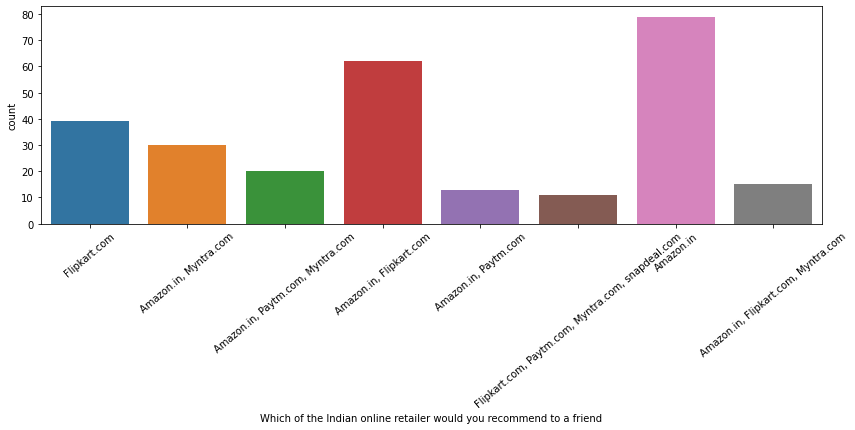

In [55]:
plt.figure(figsize=(14,4))
plt.xticks(rotation=40)
print(df['Which of the Indian online retailer would you recommend to a friend'].value_counts())
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend'])

Which of the Indian online retailer would you recommend to a friend

79 out of 269 choose amazon which tops the list

2nd most is 62 out of 269 choose amazon and flipkart

# Last Conclusion:

As in the final countplot in which user were asked which online retailer they would recommend to a friend in this Amazon.in topped the list because it is providing all the features that users want. Website is efficient and it is fast loading , it gives complete , relevant description and information of products . It is reliable and quick to complete the purchase. Amazon give speedy delivery to its customers and there are several payment options available on the website. It provides online assistance through multi channels. Providing good deals on products. Its website have visual appealing webpage layout and they offer wide variety of products and its application is easy to use . lastly the main thing why user recommend it is because of its Trustworthiness and its robust Security in protecting customer financial information and their Privacy information .

These all features make it top the list of recommended online retailer .Providing these features it is retaining its customers.

They are some cons like the amazon website topping the list In Frequent disruption when moving from one page to another this con company should see and improve it to give overall best experience to the users.